Arbeidskrav 5 sok-1005

In [848]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [849]:
fil_a = pd.read_csv("aldersfordeling-A.csv", sep=";")      # A - aldersfordeling
fil_b = pd.read_csv("innvandring-B.csv", sep=";")          # B - innvandring
fil_c = pd.read_csv("yrker-C.csv", sep=";")                # C - yrker
fil_d = pd.read_csv("utdanning-D.csv", sep=";")            # D - utdanning
fil_e = pd.read_csv("kultur-E.csv", sep=";")               # E - kultur
fil_f = pd.read_csv("utgifter-F.csv", sep=";")             # F - utgifter
fil_g = pd.read_csv("biltyper-G.csv", sep=";")             # G - biltyper
fil_tj = pd.read_csv("yrker-TJ.csv", sep=";")              # TJ - yrker, Tromsø
fil_tu = pd.read_csv("utdanning-TU.csv", sep=";")          # TU - utdanning, Tromsø
fil_ta = pd.read_csv("aldersfordeling-TA.csv", sep=";")    # TA - aldersfordeling, Tromsø

Oppgave 1 - Del 1

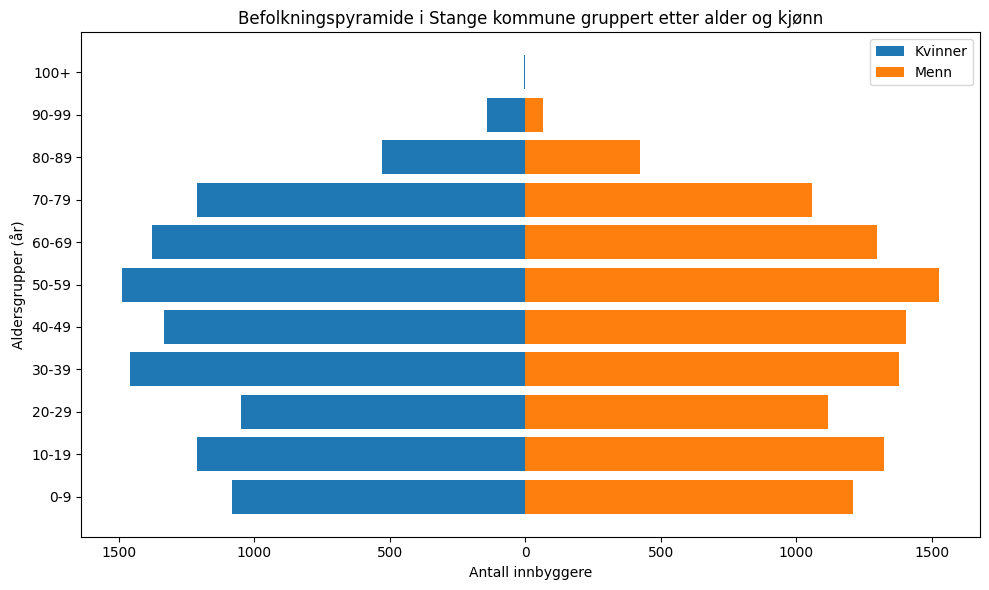

In [850]:
# Lager en ny kolonne med alder fra 0-4 uten "år" str
fil_a["Startalder"] = fil_a["Alder"].str.extract(r"(\d+)").astype(int)

# Gjør om kolonnene kvinner og menn til integers, og gjør kvinneverdiene positive
fil_a["Kvinner"] = fil_a["Kvinner"].abs().astype(int)
fil_a["Menn"] = fil_a["Menn"].astype(int)

# Lager en ny kolonne med 10-årsintervaller, // for å avrunde til nærmeste heltall
fil_a["Aldersgruppe"] = (fil_a["Startalder"] // 10) * 10

# Summererer antall personer per kjønn gruppert etter alder
gruppe = fil_a.groupby("Aldersgruppe")[["Kvinner", "Menn"]].sum()

# Gjør kvinner negative igjen for å lage befolkningspyramide
kvinner = -gruppe["Kvinner"]
menn = gruppe["Menn"]

# Lager labels på y aksen, gruppe.index vil være 10-års invervaller
labels = [f"{alder}-{alder+9}" for alder in gruppe.index]
labels[-1] = "100+"

# Plotter figuren med kvinner og menn verdiene
plt.figure(figsize=(10, 6))
plt.barh(labels, kvinner, label="Kvinner")
plt.barh(labels, menn, label="Menn")

#Gir tittel og navn på aksene. Setter på en legend
plt.xlabel("Antall innbyggere")
plt.ylabel("Aldersgrupper (år)")
plt.title("Befolkningspyramide i Stange kommune gruppert etter alder og kjønn")
plt.legend()

# Setter x aksen til å gå fra -1500 til 1600, setter 500 som intervall. Gjør verdier til venstre for 0 positive
plt.xticks(
    ticks=list(range(-1500, 1600, 500)),
    labels=[str(abs(x)) for x in range(-1500, 1600, 500)]
)

# Lager et penere layout og viser figuren
plt.tight_layout();

Oppgave 1 - Del 2

In [851]:
# Summerer og printer totalbefolkningen (kvinner + menn)
total_befolkning = fil_a["Kvinner"].sum() + fil_a["Menn"].sum()
print(f"Totalt antall innbyggere fra datarammen: {total_befolkning}")


Totalt antall innbyggere fra datarammen: 21691


Det totale innbyggertallet stemmer med data fra ssb sine nettsider. Til sammen er det 21 691 innbyggere i Stange kommune.

Oppgave 2 - Del 1

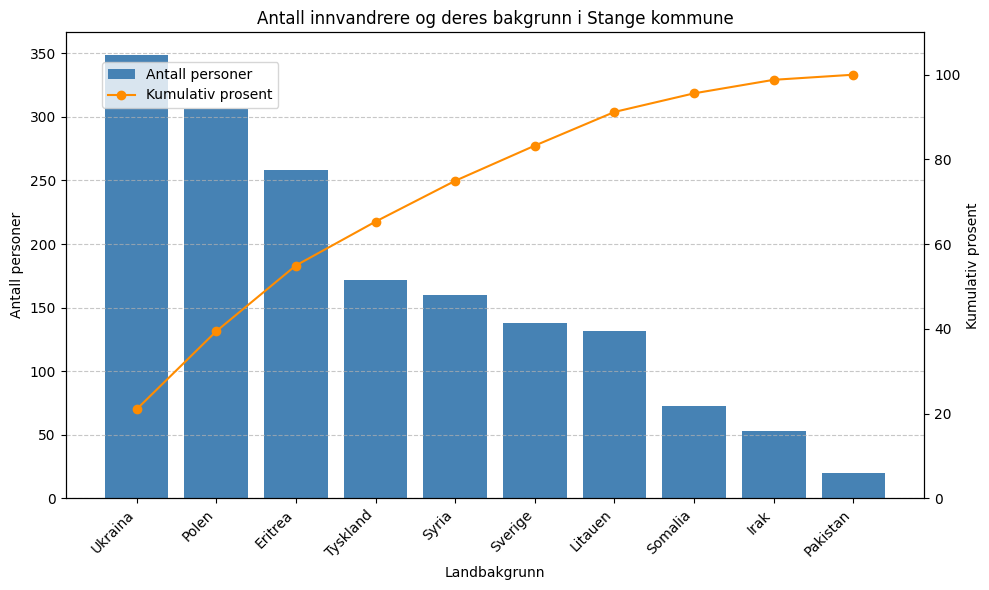

In [852]:
# Ender navnet på kolonnen til antall, inplace=True for å erstatte navnet uten å lage en ny variabel
fil_b.rename(columns={"2025": "antall"}, inplace=True)

# Sorter etter antall innvandrere med nedgående verdier
fil_b = fil_b.sort_values(by="antall", ascending=False)

# Lagen en ny kolonne med kumulativ prosent. cumsum lager en kumulativ sum, regner så ut totalen for verdier i antall
fil_b["Kumulativ prosent"] = fil_b["antall"].cumsum() / fil_b["antall"].sum() * 100

# Plotter aksene
fig, ax1 = plt.subplots(figsize=(10, 6))

# Stolpediagram, plotter verdier og aksenavn 
ax1.bar(fil_b["Land"], fil_b["antall"], color="#4682B4", label="Antall personer")
ax1.set_xlabel("Landbakgrunn")
ax1.set_ylabel("Antall personer")
ax1.set_xticks(range(len(fil_b["Land"])))
ax1.set_xticklabels(fil_b["Land"], rotation=45, ha="right")

# Kumulativ prosentlinje, plotter verdier på linjen
ax2 = ax1.twinx()
ax2.plot(fil_b["Land"], fil_b["Kumulativ prosent"], color="#FF8C00", marker="o", label="Kumulativ prosent")
ax2.set_ylabel("Kumulativ prosent")
ax2.set_ylim(0, 110)

# Legg til tittel og grid
plt.title("Antall innvandrere og deres bakgrunn i Stange kommune")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Legg til legend og right layout
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

Oppgave 2 - Del 2

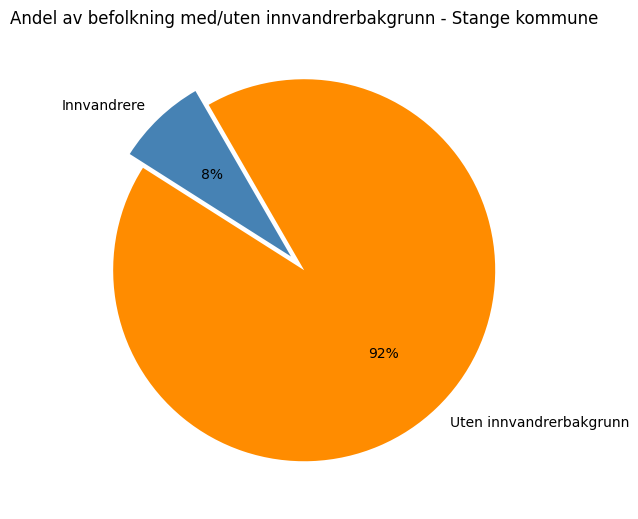

In [853]:
# Summerer antall innvandrere og personer uten innvandrerbakgrunn
total_innvandrere = fil_b["antall"].sum()
# Vi bruker totalbefolkning fra oppgave 1
uten_innvandrerbakgrunn = total_befolkning - total_innvandrere

# Definerer farger til kakediagrammet 
colors = ["#4682B4", "#FF8C00"]  # Mildere farger (pastell)

# Plotter kakediagrammet
plt.figure(figsize=(6, 6))
plt.pie(
    [total_innvandrere, uten_innvandrerbakgrunn],
    labels=["Innvandrere", "Uten innvandrerbakgrunn"],
    colors=colors,
    explode=[0.1,0],
    autopct="%1.0f%%",
    startangle=120,
)
# Legger til tittel
plt.title("Andel av befolkning med/uten innvandrerbakgrunn - Stange kommune")
plt.tight_layout();


Oppgave 3 - Del 1

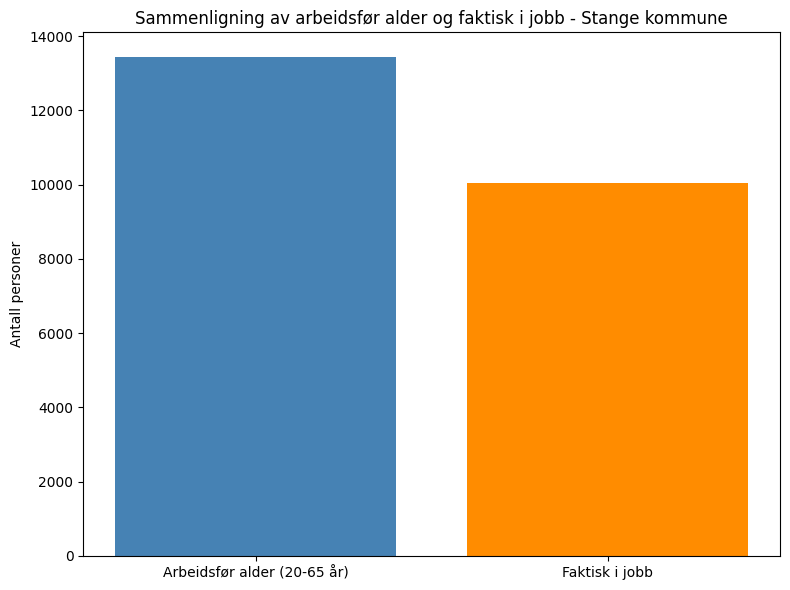

In [854]:
# Lager nytt navn på en kolonne i fil_c
fil_c.rename(columns={"2020": "antall"}, inplace=True)

# Beregner antall personer i normal arbeidsfør alder (20–65 år), 2x sum fordi vi summerer kvinner og menn først, så summen av de
arbeidsfør_alder = fil_a[(fil_a["Startalder"] >= 20) & (fil_a["Startalder"] <= 65)][["Kvinner", "Menn"]].sum().sum()

# Beregner antall personer som faktisk er i jobb fra næringene
antall_i_jobb = fil_c["antall"].sum()

# Lag stolpediagram
plt.figure(figsize=(8, 6))
plt.bar(["Arbeidsfør alder (20-65 år)", "Faktisk i jobb"], [arbeidsfør_alder, antall_i_jobb], color=["#4682B4", "#FF8C00"])
plt.title("Sammenligning av arbeidsfør alder og faktisk i jobb - Stange kommune")
plt.ylabel("Antall personer")
plt.tight_layout()
plt.show()

In [855]:
# Beregner andel i jobb blant arbeidsføre i prosent
arbeidsføre_i_jobb = 10000 / 13500 * 100
print(f"Andel i jobb blant arbeidsføre: {arbeidsføre_i_jobb:.1f}%")


Andel i jobb blant arbeidsføre: 74.1%


Figuren over viser antallet innbyggere som faktisk er i jobb, sammenlignet med arbeidsføre innbyggere. Ca 10 000 av de 13 500 arbeidsføre innbyggerne er faktisk i jobb. Dette betyr at ca 74% av de arbeidsføre jobber. Estimatet er godt fordi det tydelig viser hvor mange av de i arbeidsfør alder som faktisk jobber. Svakheter med figuren er at den ikke tar hensyn til omstendigheter som kan påvirke sysselsettningen, som studenter, uføre osv. Det er heller ingen informasjon om dette kun er fulltidsjobber eller om deltidsjobber også er inkludert. 

Oppgave 3 - Del 2

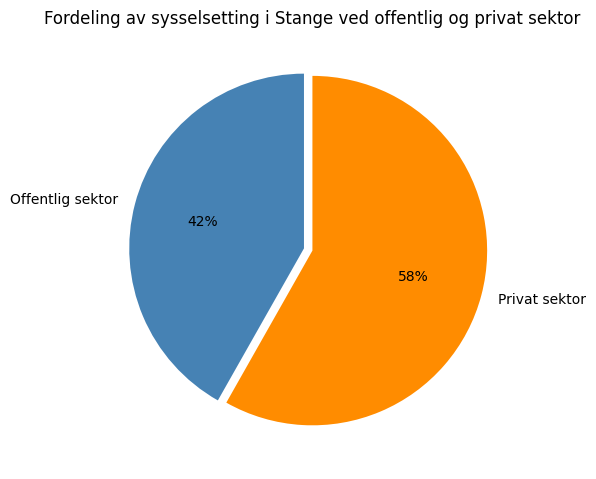

In [856]:
# Summer antall personer i offentlig og privat sektor, isin sjekker om verdiene finnes i kolonnen
offentlig_sektor = fil_c.loc[
    fil_c["Næring"].isin(["Helse- og sosialtjenester", 
                          "Undervisning", 
                          "Off.adm., forsvar, sosialforsikring"]),
                          "antall"
                          ].sum()

#finner resten ved å fjerne offentlig sektor fra totalen
privat_sektor = fil_c["antall"].sum() - offentlig_sektor

# Plotter kakediagrammet
plt.figure(figsize=(6, 6))
plt.pie(
    [offentlig_sektor, privat_sektor],
    labels=["Offentlig sektor", "Privat sektor"],
    autopct="%1.0f%%",
    colors=["#4682B4", "#FF8C00"],
    startangle=90,
    explode=[0.05, 0],
)
# Legger til tittel og justerer layout
plt.title("Fordeling av sysselsetting i Stange ved offentlig og privat sektor")
plt.tight_layout();

Figuren viser fordelingen mellom sysselsatte - offentlig og privat sektor. Figuren er lett å forstå seg på der den viser oversikt mellom de to sidene. Den viser at privat sektor dominerer i kommunen. Figuren fungerer som et overordnet bilde av sysselsettningen, men sektorene inkluderer veldig mange forskjellige yrker. Derfor kan det være vanskelig å se hva som er årsaken til at privat sektor dominerer.

Oppgave 4 - Del 1

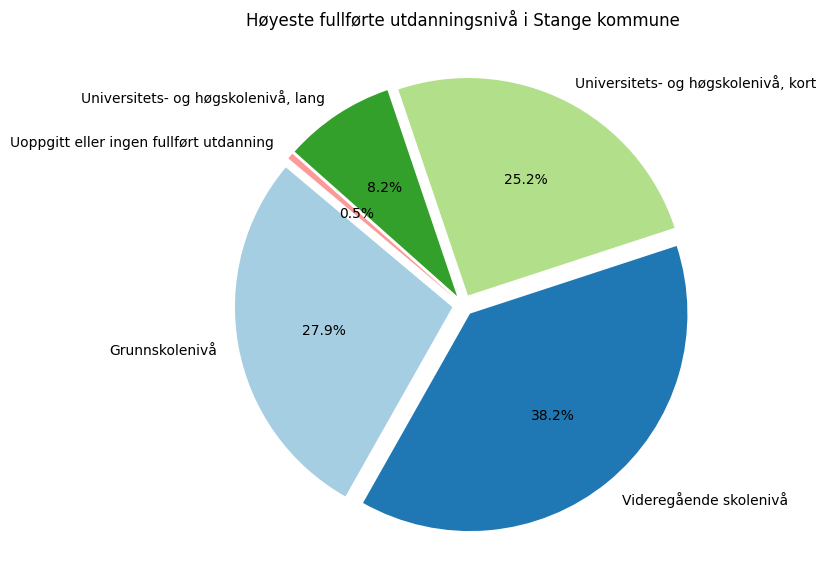

In [857]:
# Definerer labels og størrelser for kakediagrammet
labels = fil_d["Utdanningsnivå"]
sizes = fil_d["Personer 16 år og over"]

# Plotter kakediagram
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors,
    explode=[0.05] * len(labels),
)
#Legger til tittel og justerer layout
plt.title("Høyeste fullførte utdanningsnivå i Stange kommune")
plt.tight_layout();

Oppgave 4 - Del 2

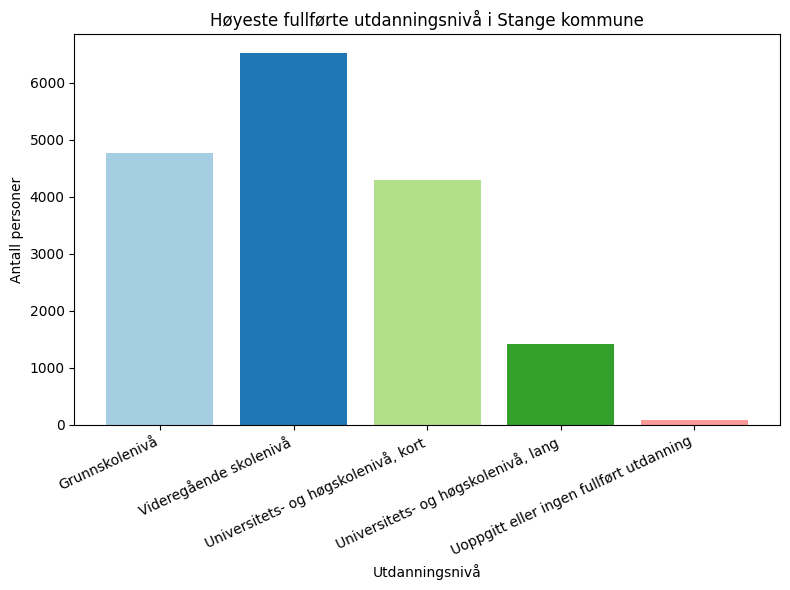

In [858]:
# Lager et stolpediagram med samme data som i kakediagrammet fra del 1
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=plt.cm.Paired.colors)
plt.title("Høyeste fullførte utdanningsnivå i Stange kommune")
plt.xlabel("Utdanningsnivå")
plt.ylabel("Antall personer")
plt.xticks(rotation=25, ha="right")
plt.tight_layout();

Oppgave 4 - Del 3

Kakediagram passer fint til å vise prosentandeler, om det ikke er for mange kategorier. Da er det lett å se hva som er størst og minst. Om det er flere enn tre kategorier kan det være vanskelig å se forskjellene. Kakediagrammet viser heller ikke antallet i kategoriene. I tilfeller der man vil se antallet i hver kategori er det bedre å bruke for eksempel et stolpediagram.

Oppgave 5 - Del 1

In [859]:
# Lager nytt navn for kolonnen "2024" i fil_e, endres til utgifter
fil_e.rename(columns={"2024": "utgifter"}, inplace=True)

# Summerer verdiene i kolonnen "2024" for å finne kulturbudsjettet
kulturbudsjett = fil_e["utgifter"].sum()
print(f"Kulturbudsjettet til kommunen er rundt {kulturbudsjett} tusen kroner per person.")

Kulturbudsjettet til kommunen er rundt 1669 tusen kroner per person.


Oppgave 5 - Del 2

In [860]:
# Finner utgiftene til kommunale idrettsbygg og anlegg, iloc[0] velger første til å matche betingelsen
idrettsbygg_utgifter = fil_e.loc[fil_e["Tjenesteområde"] == "Kommunale idrettsbygg og idrettsanlegg", "utgifter"].iloc[0]

# Beregner andelen av kulturbudsjettet
andel_idrettsbygg = (idrettsbygg_utgifter / kulturbudsjett) * 100
print(f"Andel av kulturbudsjettet som går til kommunale idrettsbygg og anlegg: {andel_idrettsbygg:.2f}%")

Andel av kulturbudsjettet som går til kommunale idrettsbygg og anlegg: 16.24%


Oppgave 6

In [861]:
# Lager nytt navn for kolonnen "2024" i fil_f
fil_f.rename(columns={"2024": "utgifter"}, inplace=True)

# Konverter kolonnen "utgifter" til en float og gjør komma til punktum
fil_f["utgifter"] = fil_f["utgifter"].str.replace(",", ".").astype(float)

# Summerer utgiftene
inkluderte_utgifter = fil_f["utgifter"].sum()

# Totalutgifter for kommunen der vi setter utgiftene til 100 %
total_kommunale_utgifter = 100

# Beregner prosentandel som ikke er inkludert
ikke_inkluderte_utgifter = total_kommunale_utgifter - inkluderte_utgifter
prosent_ikke_inkludert = (ikke_inkluderte_utgifter / total_kommunale_utgifter) * 100

print(f"Prosentandel av kommunens utgifter som ikke er inkludert i datagrunnlaget: {prosent_ikke_inkludert:.1f}%")

Prosentandel av kommunens utgifter som ikke er inkludert i datagrunnlaget: 12.6%


Oppgave 7 - Del 1

In [862]:
# Gir nytt navn til kolonnen "2024" i fil_g
fil_g.rename(columns={"2024": "antall"}, inplace=True)

# Finner antall biler med "Annet drivstoff" som regnes som hybridbiler
hybridbiler = fil_g.loc[fil_g["Drivstoff"] == "Annet drivstoff", "antall"].iloc[0]

# Finner totalt antall biler
totalt_antall_biler = fil_g["antall"].sum()

# Beregner andelen hybridbiler og finner prosentandelen
andel_hybridbiler = (hybridbiler / totalt_antall_biler) * 100
print(f"Andelen hybridbiler i kommunen er rundt {andel_hybridbiler:.2f}%")

Andelen hybridbiler i kommunen er rundt 11.25%


Oppgave 7 - Del 2

In [863]:
# Filtrer personer i kjørbar alder (20-80 år)
kjørbar_alder = fil_a[(fil_a["Startalder"] >= 20) & (fil_a["Startalder"] <= 80)][["Kvinner", "Menn"]].sum().sum()

# Beregner antall biler per person i kjørbar alder
biler_per_person = totalt_antall_biler / kjørbar_alder
print(f"Antall biler for personer i kjørbar alder (20-80 år) er {biler_per_person:.1f} per person")

Antall biler for personer i kjørbar alder (20-80 år) er 0.8 per person


Oppgave 8 - Del 1

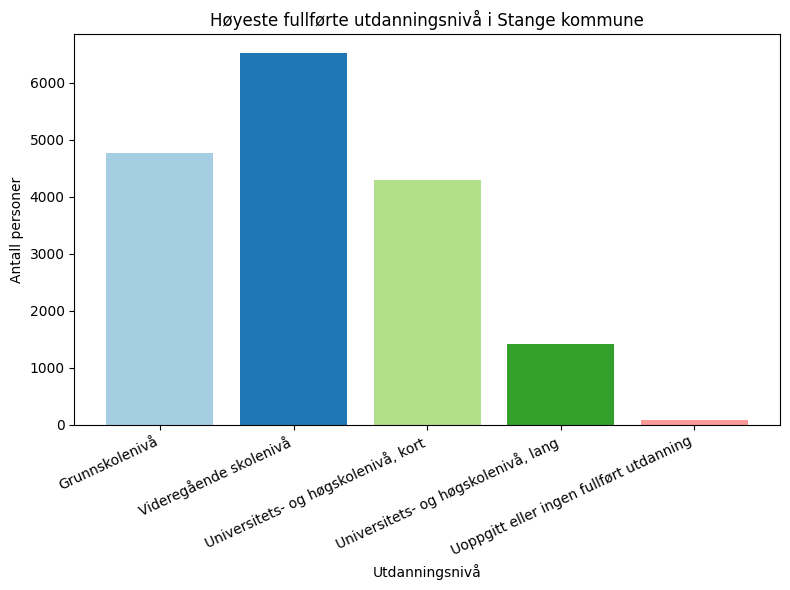

In [864]:
# Definerer en funksjon (figur) som henter inn data for å plotte et stolpediagram
def figur(data, kategori_kolonne, verdi_kolonne, tittel, x_akse, y_akse):

    # plotter og legger til tittel og aksenavn, endrer på layout
    plt.figure(figsize=(8, 6))
    plt.bar(data[kategori_kolonne], data[verdi_kolonne], color=plt.cm.Paired.colors)
    plt.title(tittel)
    plt.xlabel(x_akse)
    plt.ylabel(y_akse)
    plt.xticks(rotation=25, ha="right")
    plt.tight_layout();

# Setter ønsket data inn i funksjonen for å plotte figuren.
figur(
    data=fil_d,
    kategori_kolonne="Utdanningsnivå",
    verdi_kolonne="Personer 16 år og over",
    tittel="Høyeste fullførte utdanningsnivå i Stange kommune",
    x_akse="Utdanningsnivå",
    y_akse="Antall personer"
)

Oppgave 8 - Del 2

Funksjonen trenger ikke et return-statement fordi vi ikke trenger et tall eller en verdi. Vi skal bare bruke funksjonen direkte til å plotte en figur. Derfor er det ingen hensikt i å beholde verdien i en variabel.

Oppgave 9 - Del 1

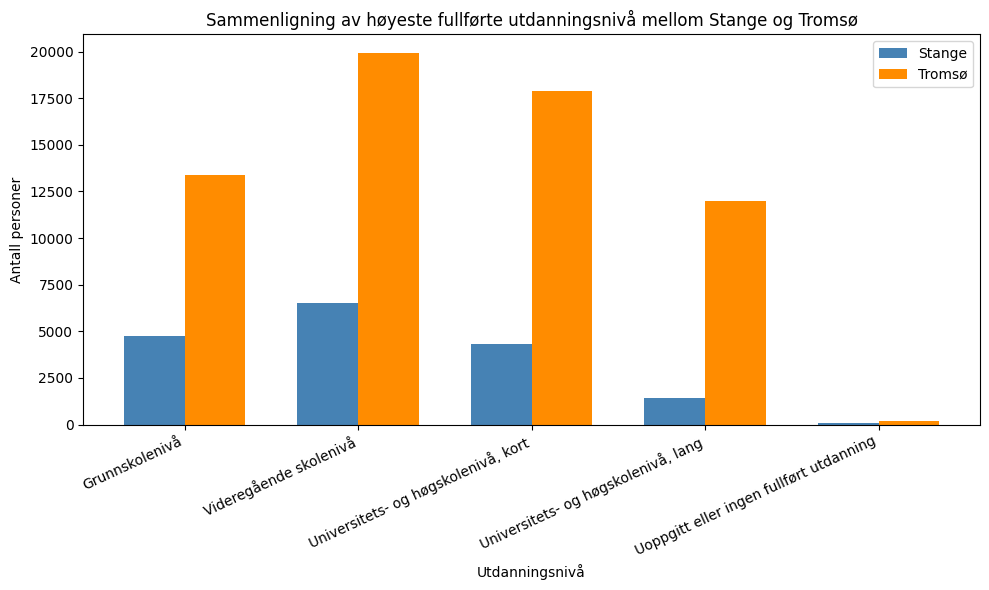

In [ ]:
# Data for Stange og Tromsø
utdanning_labels = fil_d["Utdanningsnivå"]
stange_sizes = fil_d["Personer 16 år og over"]
tromsø_sizes = fil_tu["Personer 16 år og over"]

# Navn for verdiene i x aksen, laget et numpy array med x verdier, enklere med numpy ved regning
x = np.arange(len(utdanning_labels))

# Plottet, definerer bar bredde til 0.35
plt.figure(figsize=(10, 6))
bar_width = 0.35

#Sørger for at stolpene ikke overlapper hverandre, og plasserer dem på x aksen
plt.bar(x - bar_width/2, stange_sizes, bar_width, label="Stange", color="#4682B4")
plt.bar(x + bar_width/2, tromsø_sizes, bar_width, label="Tromsø", color="#FF8C00")

# Legger til tittel, aksenavn osv.
plt.title("Sammenligning av høyeste fullførte utdanningsnivå mellom Stange og Tromsø")
plt.xlabel("Utdanningsnivå")
plt.ylabel("Antall personer")
plt.xticks(x, utdanning_labels, rotation=25, ha="right")
plt.legend()
plt.tight_layout();

Oppgave 9 - Del 2

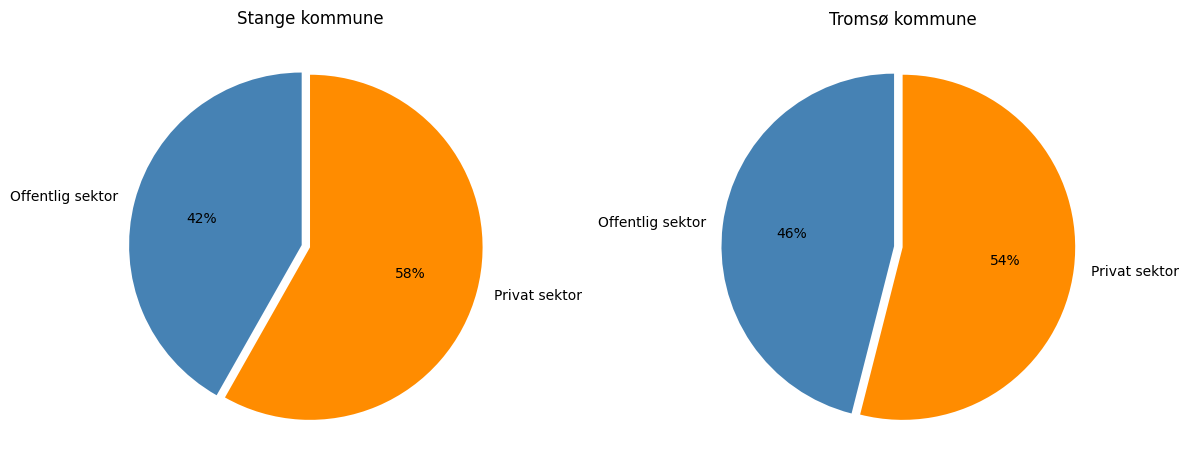

In [866]:
# Lager nytt navn på 2020 kolonnen i fil_tj
fil_tj.rename(columns={"2020": "antall"}, inplace=True)

# Summerer antall personer i offentlig og privat sektor, på samme måte som tidligere
offentlig_sektor_tromsø = fil_tj.loc[
    fil_tj["Næring"].isin(["Helse- og sosialtjenester", 
                           "Undervisning", 
                           "Off.adm., forsvar, sosialforsikring"]),
                           "antall"
                           ].sum()

privat_sektor_tromso = fil_tj["antall"].sum() - offentlig_sektor_tromsø

# Lager et subplot slik at vi kan sette sammen to kakediagrammer i en figur
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Kakediagram for Stange
axes[0].pie(
    [offentlig_sektor, privat_sektor],
    labels=["Offentlig sektor", "Privat sektor"],
    autopct="%1.0f%%",
    colors=["#4682B4", "#FF8C00"],
    startangle=90,
    explode=[0.05, 0]
)
axes[0].set_title("Stange kommune")

# Kakediagram for Tromsø
axes[1].pie(
    [offentlig_sektor_tromsø, privat_sektor_tromso],
    labels=["Offentlig sektor", "Privat sektor"],
    autopct="%1.0f%%",
    colors=["#4682B4", "#FF8C00"],
    startangle=90,
    explode=[0.05, 0]
)
axes[1].set_title("Tromsø kommune")

plt.tight_layout();

Oppgave 9 - Del 3

In [867]:
#Lager en ny kolonne med år med 5 års invervaller, konverterrt til integers, og fjerner "år" str
fil_ta["Startalder_tromsø"] = fil_ta["Alder"].str.extract(r"(\d+)").astype(int)

#Gjør om verdiene i kvinne kolonnen til positive tall
fil_ta["Kvinner"] = fil_ta["Kvinner"].abs()

# Arbeidsfør alder i Tromsø (20–65 år)
arbeidsfør_alder_tromsø = fil_ta[(fil_ta["Startalder_tromsø"] >= 20) & 
                                 (fil_ta["Startalder_tromsø"] <= 65)][["Kvinner", "Menn"]].sum().sum()

# Antall personer i jobb i Tromsø
antall_i_jobb_tromsø = fil_tj["antall"].sum()

# Andel i jobb blant arbeidsføre i Tromsø
andel_i_jobb_tromsø = (antall_i_jobb_tromsø / arbeidsfør_alder_tromsø) * 100

# Printer svarene for sammenligning
print(f"Andel i jobb blant arbeidsføre i Stange: {arbeidsføre_i_jobb:.1f}%")
print(f"Andel i jobb blant arbeidsføre i Tromsø: {andel_i_jobb_tromsø:.1f}%")

Andel i jobb blant arbeidsføre i Stange: 74.1%
Andel i jobb blant arbeidsføre i Tromsø: 77.7%


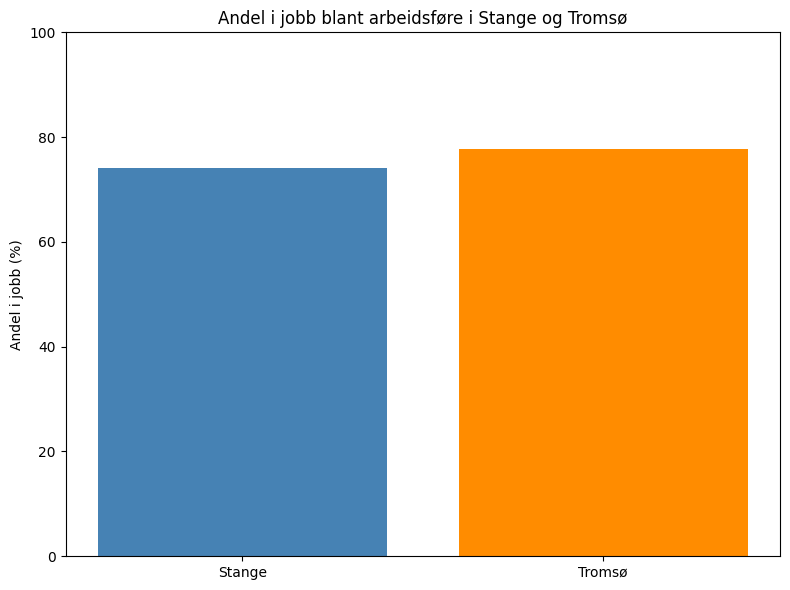

In [868]:
# Definerer kommunene og andelene for å plotte
kommuner = ["Stange", "Tromsø"]
andeler = [arbeidsføre_i_jobb, andel_i_jobb_tromsø]

# Lager plottet
plt.figure(figsize=(8, 6))
plt.bar(kommuner, andeler, color=["#4682B4", "#FF8C00"])
plt.title("Andel i jobb blant arbeidsføre i Stange og Tromsø")
plt.ylabel("Andel i jobb (%)")
plt.ylim(0, 100)
plt.tight_layout();